### Gradient Descent 
1. <b>Import data</b>
2. <b> Fit a linear model </b>
3. <b> Cost Function, Introduction </b>
4. <b> Partial deriavtes </b>
5. <b> Gradient Descent algorithm </b>
6. <b> Conclusion </b>

In [1]:
import json
import matplotlib
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.core.pylabtools import figsize
from mpl_toolkits.mplot3d import Axes3D

warnings.simplefilter("ignore")
root = r"/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/styles/bmh_matplotlibrc.json"
s = json.load(open(root))
matplotlib.rcParams.update(s)
% matplotlib inline

In [2]:
# import the data
headers =["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year",
          "origin", "car name"]

_root = '/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/data/auto.csv'
cars = pd.read_table(_root, delim_whitespace = True, names = headers)
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')
filtered_cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


The model is written as $ Y = \theta_1 * X_i + \theta_0 + \epsilon_i $ 
Where $ \theta $ 's are the coefficients and $\epsilon $ are error term

In [3]:
# Normalized the data
filtered_cars.weight = (filtered_cars.weight - filtered_cars.weight.mean())/filtered_cars.weight.std()
filtered_cars.mpg = (filtered_cars.mpg - filtered_cars.mpg.mean())/filtered_cars.mpg.std()

In [4]:
# we can add a dimension to an array by using np.newaxis
# The X variable in LinearRegression.fit() must have 2 dimensions

features = filtered_cars.weight[:, np.newaxis]
target = filtered_cars.mpg

lr = LinearRegression()
lr.fit(features, target)

#here we would assign the coeffiient of X to the variable theta1
theta_1 = lr.coef_[0]

In [5]:
theta_1

-0.83224421483157585

### Cost Function Introduction
We utilized a pre-existing library sklearn to estimate the coefficients of our linear model, using least squares. The least squares method can effectively fit linear models since it only requires matrix algebra and provides deterministic estimates of the coefficients. Least squares is a method which directly minimized the sum of square error in a model algebraically. <i>Often times we have too much data to fit into memory and we can't use least squares.</i><br><br>
$Gradient Descent$ is a general method that can be used to estimate coefficient of nearly any model, including linear models. At it's core, gradient descent minimizes the residuals in the estimated model by updating each coefficent based on it's gradient.<br><br>
To start we must understand cost functions. Most cost functions measure the difference between a model predictions and it's corresponding observations with the coefficients as parameters. Let's say our model is $h_{\theta}(x) = \theta_1 x + \theta_0$
The <b>cost function</b> is then define as $J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i = 1}^N (h_{\theta}(x_i)- y_i)^2$<br><br>
the cost here is one half the average difference between our prediction and observation squared. As we change the coefficients of the model this cost changes. During modeling we will randomly choose the coefficients and update them intelligently to minimize this cost.

0.00206247859689


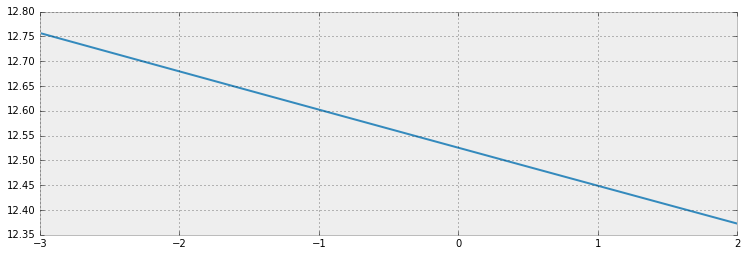

In [6]:
def cost(theta_0, theta_1, x, y):
    """
    Convenience function:
        cost function of a single variable linear model
    """
    J = 0
    m = len(x)
    for i in np.arange(m):
        h = theta_1 * x[i] + theta_0
        J += (h - y[i])**2
        J /= (2 * m)
    return J

#the cost for theta_0 = 0, theta_1 = 1
print(cost(0, 1, filtered_cars.weight.values, filtered_cars.mpg.values))

theta_0 = 100
thetas_1 = np.linspace(-3, 2, 100)
costs = []

for theta_1 in thetas_1:
    costs.append(cost(theta_0, theta_1, filtered_cars.weight.values, filtered_cars.mpg.values))
    
figsize(12.5, 4)
plt.plot(thetas_1, costs);

The cost function above is not quadratic, but most of the time it's, with respect to the slope and in tose case we  can see there is a global 
minimum. A global minimum is the point where the function has the lowest value. We need to find the best set of parameters to minimize the cost function, but here we are only varying the slope and keeping the intercept constant. The minimum of the cost function is the point where the model has the lowest error, hence the point where our parameters are optimized. Instead we can use a 3D plot to visualize this cost function where the x and y axis will be the slope and intercept and the z axis will be the cost.

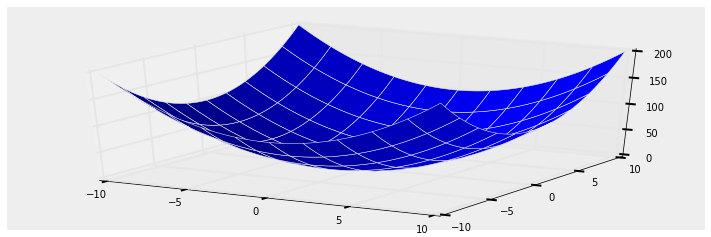

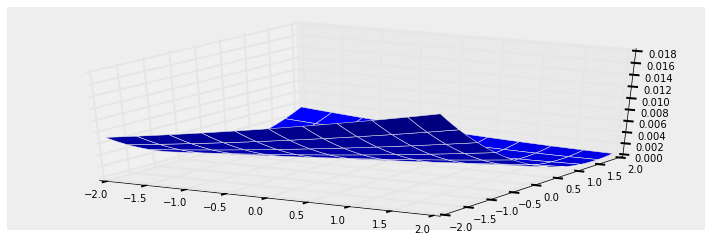

In [7]:

x =  np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X=X, Y=Y, Z=Z)
plt.show()

#real case:
thetas_0 = np.linspace(-2, 2, 100)
thetas_1 = np.linspace(-2, 2, 100)
COST = np.empty(shape=(100, 100))
T0S, T1S = np.meshgrid(thetas_0, thetas_1)

for i in np.arange(100):
    for j in np.arange(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0],
                        filtered_cars.weight.values, filtered_cars.mpg.values)
fig2 = plt.figure()
ax = fig2.gca(projection = '3d')
ax.plot_surface(X=T0S, Y=T1S, Z=COST)
plt.show();

Gradient Descent minimize the cost function by using partial deriavtes of the cost according to each parameter $\theta_0$ and $\theta_1$ : <br>
The partial derivative of the cost function in terms of $\theta_0$ is : $\frac{\partial J(\theta_0, \theta_1)}{\partial(\theta_0)} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)- y_i)$<br><br>
The partial derivative of the cost function in terms of $\theta_1$ is : $\frac{\partial J(\theta_0, \theta_1)}{\partial(\theta_1)} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i)- y_i)*x_i$

Let's write those two function : 

In [8]:
def partial_cost_theta1(theta_0, theta_1, x, y):
    """
    Convenience function:
        compute the partial derivates for theta1
    """
    h = theta_0 + theta_1 * x
    diff = (h - y) * x
    partial = diff.sum() / (x.shape[0])
    return partial

def partial_cost_theta0(theta_0, theta_1, x, y):
    """
    Convenience function:
        compute the partial derivates for theta0
    """
    h = theta_0 + theta_1 * x
    diff = (h - y) 
    partial = diff.sum() / (x.shape[0])
    return partial

The general gradient descent algorithm for two variables is:<br><br>
    repeat until convergence: <center>{ $ \theta_1 := \theta_1 - \alpha * \frac{\partial J(\theta_0, \theta_1)}{\partial(\theta_0)}$ $  \theta_0 := \theta_0 - \alpha * \frac{\partial J(\theta_0, \theta_1)}{\partial(\theta_1)}$ }</center> <br>
$\alpha$ is the learning rate, This value is set by the user and controls how fast the algorithm will converge by changing the parameters by some percentage of the slope. Values of this learning rate can vary from project to project but in general learning rates can be between 0.0001 and 1.
This value must not be too large or the algorithm will overshoot the minimum but if it's too small it will take many iterations to converge.<br><br>
We will start by initializing a few variables. updates will store our convergence data for visualization later. theta0 and theta1 will hold initial values of the slope and intercept. alpha is used for our learning rate. Finding a learning rate is often done by trial and error. A good starting point is 0.01. If you find that the algorithm is learning too slowly it can be increased. If the cost starts increasing out of control then the learning rate is probably overshooting the minimum and should be decreased. We will then use the max_epochs to limit the number of iterations so it doesn't run forever. c will be used to hold the initial cost using the initial parameters.

In [11]:
def gradient_descent(x, y, alpha = 0.1, theta_0 = 0, theta_1 = 0):
    """
    Conevnience function:
        gradient descent optmizer
    """
    max_epochs = 10000 # maximum nuber of iteration
    counter = 0
    #initial cost
    c = cost(theta_0, theta_1, filtered_cars.weight.values, filtered_cars.mpg.values)
    costs = [c] # let's store each updates
    
    # Set a convergence threshold to find where the cost function is minimal, when the difference
    #between the prev cost and curr cost is less than this value we will say the parameters converged
    convergence_thres = 0.000001
    cprev = c + 10
    thetas_0 = [theta_0]
    thetas_1 = [theta_1]
    
    # stop updating when costs converge or we hit a large number of iterations.
    while(np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        update_0 = alpha * partial_cost_theta0(theta_0, theta_1, x, y)
        update_1 = alpha * partial_cost_theta1(theta_0, theta_1, x, y)
        
        # Update thetas at the same time
        theta_0 -= update_0
        theta_1 -= update_1
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
        #compute the new cost
        c = cost(theta_0, theta_1, filtered_cars.weight.values, filtered_cars.mpg.values )
        
        costs.append(c)
        counter +=1
        
    return { "theta_0": theta_0, "theta_1": theta_1, "costs": costs}





print("theta_1 = ", gradient_descent(x = filtered_cars.weight.values, y = filtered_cars.mpg.values)["theta_1"] )    

theta_1 =  -0.8168929821


Gradient descent is a widely used algorithm for computing local and global minimum in functions. Here we showed that gradient descent produced nearly identical results as least squares. As your data becomes larger and more complex gradient descent can aid in parameter optimization. Looking forward, we will use a modified gradient descent to teach neural networks.